<a href="https://colab.research.google.com/github/Naufall1/PCVK_Ganjil_2024/blob/main/PCVK_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Praktikum

## Transformasi Linier Brightness

Masukkan nilai brightness: 50
(256, 256, 3)


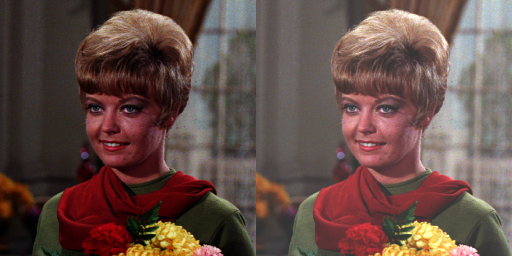

In [33]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

try:
  brightness = int(input('Masukkan nilai brightness: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/images/female/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

print(original.shape)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[x,y,c] = np.clip(original[x,y,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Tugas Praktikum

## Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori.

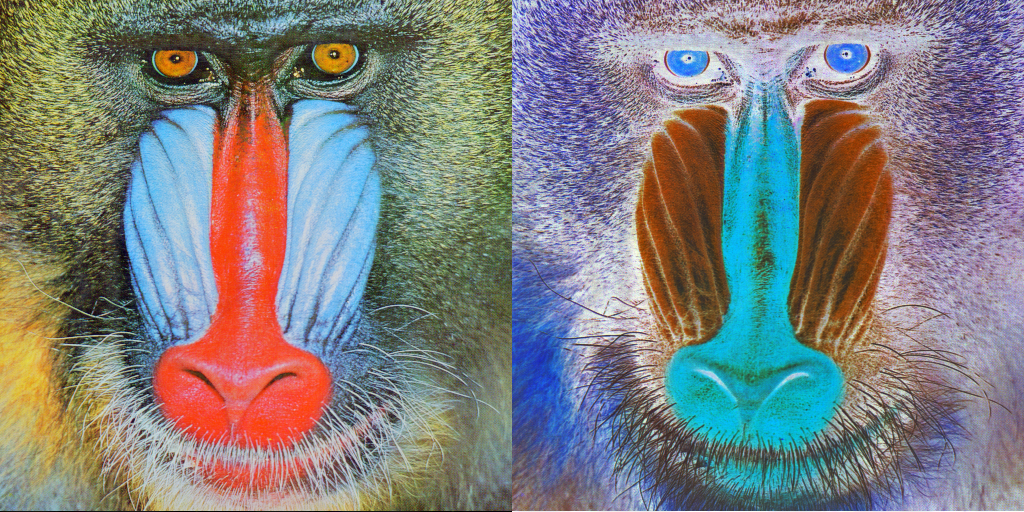

In [11]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/images/mandrill/mandrill.tiff')
inverse_image = np.zeros(img.shape, img.dtype)

for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    for c in range(img.shape[2]):
      inverse_image[x,y,c] = 255 - img[x,y,c]

final_frame = cv.hconcat((img, inverse_image))
cv2_imshow(final_frame)

## Implementasikan transformasi contrast pada Google Colaboratory menggunakan  formula yang terdapat pada bagian Ulasan Teori untuk kontras

Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 - 3.0]: 2


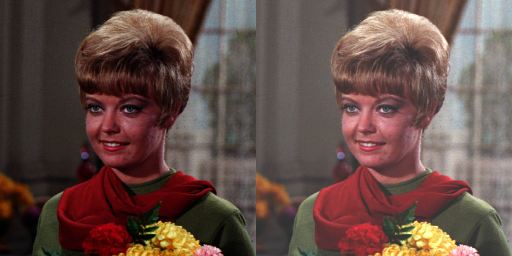

In [22]:
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  kontras = float(input('Masukkan nilai kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/images/female/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

factor = (259 * (kontras + 255)) / (255 * (259 - kontras))
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[x,y,c] = np.clip((factor * (original[x,y,c] - 128) + 128) + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

## Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log

 Mengubah tingkat kecerahan citra dengan Transformasi Log
Masukkan nilai kecerahan [-255 - 255]: 50


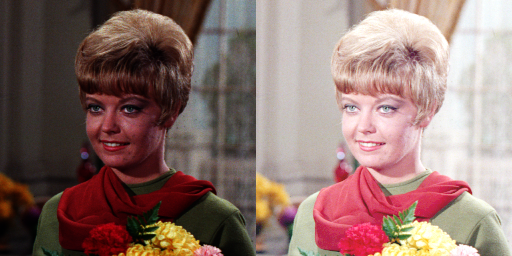

In [34]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log')

try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/images/female/female.tiff')
brightness_image = np.clip(brightness * (np.log(original + 1)) , 0, 255)
brightness_image = np.array(brightness_image, dtype = np.uint8)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

## Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori,

<ipython-input-79-a43a44a6e885>:23: RuntimeWarning: overflow encountered in scalar add
  res_image[x,y] = np.clip((np.max(original[x,y]) + np.min(original[x,y])) // 2, 0, 255)


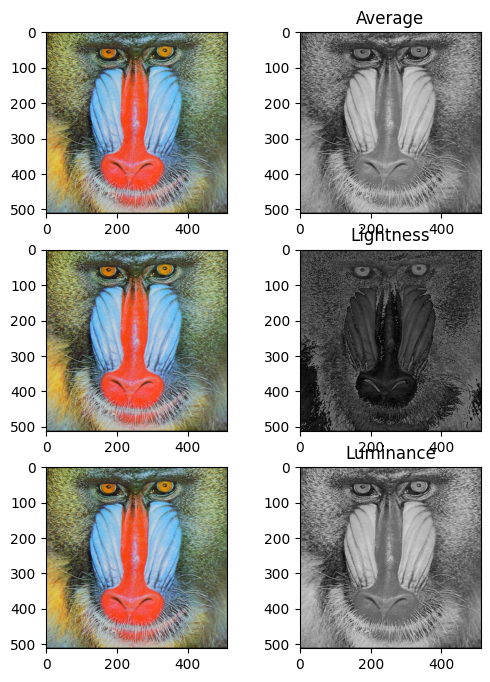

In [79]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np


img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/images/mandrill/mandrill.tiff')

original = cv.cvtColor(img, cv.COLOR_BGR2RGB)

def averaging():
  res_image = np.zeros(original.shape, original.dtype)
  for y in range(original.shape[0]):
    for x in range(original.shape[1]):
      res_image[x,y] = sum(original[x,y]) // 3
  return res_image

def lightness():
  res_image = np.zeros(original.shape, original.dtype)
  for y in range(original.shape[0]):
    for x in range(original.shape[1]):
      res_image[x,y] = np.clip((np.max(original[x,y]) + np.min(original[x,y])) // 2, 0, 255)
  return res_image

def luminance():
  res_image = np.zeros(original.shape, original.dtype)
  for y in range(original.shape[0]):
    for x in range(original.shape[1]):
      res_image[x,y] = (original[x,y,0]*0.21) + (original[x,y,1]*0.72) + (original[x,y,2]*0.07)
  return res_image

fig, axs = plt.subplots(3, 2,  figsize=(6, 8))

axs[0,1].set_title('Average')
axs[0,0].imshow(original)
axs[0,1].imshow(averaging())

axs[1,1].set_title('Lightness')
axs[1,0].imshow(original)
axs[1,1].imshow(lightness())

axs[2,1].set_title('Luminance')
axs[2,0].imshow(original)
axs[2,1].imshow(luminance())

plt.show()


## Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale

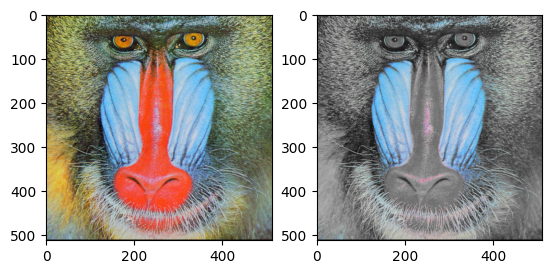

In [92]:
from pprint import pprint
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/images/mandrill/mandrill.tiff')

original = cv.cvtColor(img, cv.COLOR_BGR2RGB)
fig, axs = plt.subplots(1, 2)

mix_image = np.zeros(original.shape, original.dtype)
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
      if original[x,y,2] < 160:
        mix_image[x,y] = sum(original[x,y]) // 3
      else:
        mix_image[x,y] = original[x,y]

axs[0].imshow(original)
axs[1].imshow(mix_image)